### This is the code for Research Question 4 : Which sports may interest or inspire our customers in terms of Olympic success?
- Download the clean_olympics_dataset.csv database from GitHub repo
- Run each line of code below

### Import libraries and read the data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_csv("clean_olympics_dataset.csv")


### Check the data imported properly

In [2]:
df.head(10)

,Unnamed: 0,Name,Sex,Age,Team,Country,NOC,Games,Year,Season,City,Sport,Event,Medal
0,51139,GEORGES DAVIEL DE LA NZIRE,M,17,FRANCE,FRANCE,FRA,1896 SUMMER,1896,SUMMER,ATHINA,ATHLETICS,ATHLETICS MEN'S 800 METRES,NONE
1,33940,EUGNE HENRI CALLOT,M,20,FRANCE,FRANCE,FRA,1896 SUMMER,1896,SUMMER,ATHINA,FENCING,"FENCING MEN'S FOIL, INDIVIDUAL",SILVER
2,51201,HENRI DE LABORDE,M,25,FRANCE,FRANCE,FRA,1896 SUMMER,1896,SUMMER,ATHINA,FENCING,"FENCING MEN'S FOIL, INDIVIDUAL",NONE
3,52537,J. DEFERT,M,25,FRANCE,FRANCE,FRA,1896 SUMMER,1896,SUMMER,ATHINA,TENNIS,TENNIS MEN'S SINGLES,NONE
4,63068,LAUNCESTON ELLIOT,M,21,GREAT BRITAIN,GREAT BRITAIN,GBR,1896 SUMMER,1896,SUMMER,ATHINA,ATHLETICS,ATHLETICS MEN'S 100 METRES,NONE
5,16001,EDWARD BATTEL,M,25,GREAT BRITAIN,GREAT BRITAIN,GBR,1896 SUMMER,1896,SUMMER,ATHINA,CYCLING,CYCLING MEN'S 100 KILOMETRES,NONE
6,16000,EDWARD BATTEL,M,25,GREAT BRITAIN,GREAT BRITAIN,GBR,1896 SUMMER,1896,SUMMER,ATHINA,CYCLING,CYCLING MEN'S 333 METRES TIME TRIAL,NONE
7,15999,EDWARD BATTEL,M,25,GREAT BRITAIN,GREAT BRITAIN,GBR,1896 SUMMER,1896,SUMMER,ATHINA,CYCLING,"CYCLING MEN'S ROAD RACE, INDIVIDUAL",BRONZE
8,63072,LAUNCESTON ELLIOT,M,21,GREAT BRITAIN,GREAT BRITAIN,GBR,1896 SUMMER,1896,SUMMER,ATHINA,GYMNASTICS,GYMNASTICS MEN'S ROPE CLIMBING,NONE
9,24683,JOHN MARY PIUS BOLAND,M,25,GREAT BRITAIN/GERMANY,GREAT BRITAIN,GBR,1896 SUMMER,1896,SUMMER,ATHINA,TENNIS,TENNIS MEN'S DOUBLES,GOLD


In [3]:
# set gold silver bronze palette for seaborn graphs, and a spare blue colour for 'none'

gsb_palette = ['#d4af37','#c0c0c0', '#cd7f32', '#28d1d4']
sns.set_palette(gsb_palette)



In [4]:
#better image res for seaborn so that the graph can be bigger for the report

sns.set(rc={"figure.dpi":200, 'savefig.dpi':200})
sns.set_context('notebook')
#sns.set_style("ticks")

## Which sports may interest or inspire our customers in terms of Olympic success? 
- in which sports does team GB have the most medals (all time, all genders)?
- in which sports do team GB women have the most medals (all time)?

- is there a sport that team GB have never won a gold medal for despite winning bronze or silver?

In [5]:
#list all sports in the Sport column
sports = df['Sport'].unique()
print(sports)

['ATHLETICS' 'FENCING' 'TENNIS' 'CYCLING' 'GYMNASTICS' 'WEIGHTLIFTING'
 'WRESTLING' 'SHOOTING' 'SWIMMING' 'EQUESTRIAN' 'ARCHERY' 'FOOTBALL'
 'ROWING' 'WATER POLO' 'TUG-OF-WAR' 'BASQUE PELOTA' 'CRICKET' 'CROQUET'
 'GOLF' 'POLO' 'RUGBY' 'SAILING' 'LACROSSE' 'DIVING' 'BOXING' 'ROQUE'
 'HOCKEY' 'FIGURE SKATING' 'JEU DE PAUME' 'MOTORBOATING' 'RACQUETS'
 'MODERN PENTATHLON' 'ART COMPETITIONS' 'ICE HOCKEY' 'ALPINISM'
 'SPEED SKATING' 'CROSS COUNTRY SKIING' 'MILITARY SKI PATROL'
 'NORDIC COMBINED' 'BOBSLEIGH' 'CURLING' 'SKI JUMPING' 'SKELETON'
 'CANOEING' 'HANDBALL' 'ALPINE SKIING' 'BASKETBALL' 'CROSS-COUNTRY SKIING'
 'BIATHLON' 'JUDO' 'LUGE' 'VOLLEYBALL' 'SYNCHRONIZED SWIMMING'
 'RHYTHMIC GYMNASTICS' 'TABLE TENNIS' 'FREESTYLE SKIING' 'BADMINTON'
 'SHORT TRACK SPEED SKATING' 'BASEBALL' 'BEACH VOLLEYBALL' 'SOFTBALL'
 'SNOWBOARDING' 'TRAMPOLINING' 'TAEKWONDO' 'TRIATHLON'
 'ARTISTIC GYMNASTICS' 'RUGBY SEVENS' 'CANOE SPRINT' 'CYCLING ROAD'
 'KARATE' 'MARATHON SWIMMING' 'CANOE SLALOM' 'CYCLING BMX 

### in which sports does team GB have the most medals (all time, all genders)?

In [6]:
# subset dataframe to remove all rows with athletes who didn't win a medal, and all rows who's athletes are not in Team Great Britain
df_Medals = df[df['Medal']!='NONE']
df_Medals_GB = df_Medals[df_Medals['Country']=='GREAT BRITAIN']

#create lots of different grouped dfs to later be merged. the reason for doing this in the graphing is to have total counts and to be able to order the sports in a way that makes sense

#create grouped df by 3 medal types and sex
df_M_S = df_Medals_GB.groupby(['Sex', 'Medal', 'Sport']).size().reset_index(name='count')
df_M_S = df_M_S.rename(columns={'count': 'count_by_medal_sex'})

#create grouped df with 3 medal types
df_M = df_Medals_GB.groupby(['Medal', 'Sport']).size().reset_index(name='count')
df_M = df_M.rename(columns={'count': 'count_by_medal'})

#create grouped df by sex
df_S = df_Medals_GB.groupby(['Sex', 'Sport']).size().reset_index(name='count')
df_S = df_S.rename(columns={'count': 'count_by_sex'})


#create grouped df by sport
df_Sport = df_Medals_GB.groupby(['Sport']).size().reset_index(name='count')
df_Sport = df_Sport.rename(columns={'count': 'total_count'})


# Merge the first three dfs

merged_df = pd.merge(df_Sport, df_M, on=['Sport'])
merged_df = pd.merge(merged_df, df_S, on=['Sport'])


# Merge the final df, reorder the columns, and sort it by total count
final_merged_df = pd.merge(merged_df, df_M_S, on=['Sport', 'Medal', 'Sex'])
final_merged_df = final_merged_df[['Sport', 'Sex', 'Medal', 'total_count', 'count_by_medal', 'count_by_sex', 'count_by_medal_sex']]

final_merged_df = final_merged_df.sort_values('total_count', ascending=False)

In [7]:
final_merged_df

,Sport,Sex,Medal,total_count,count_by_medal,count_by_sex,count_by_medal_sex
11,ATHLETICS,F,SILVER,111,51,27,8
7,ATHLETICS,F,BRONZE,111,34,27,17
8,ATHLETICS,M,BRONZE,111,34,84,17
9,ATHLETICS,F,GOLD,111,26,27,2
10,ATHLETICS,M,GOLD,111,26,84,24
...,...,...,...,...,...,...,...
40,CYCLING MOUNTAIN BIKE,M,GOLD,1,1,1,1
23,CANOE SLALOM,F,SILVER,1,1,1,1
24,CANOE SPRINT,M,BRONZE,1,1,1,1
109,SKATEBOARDING,F,BRONZE,1,1,1,1


In [8]:
print(df_Sport.sort_values('total_count', ascending = False))

                    Sport  total_count
4               ATHLETICS          111
32                 ROWING           91
39               SWIMMING           70
24                 HOCKEY           67
13                CYCLING           65
35                SAILING           56
19             EQUESTRIAN           35
41                 TENNIS           29
36               SHOOTING           24
7                  BOXING           21
17          CYCLING TRACK           17
25             ICE HOCKEY           14
22               FOOTBALL           13
11                CRICKET           12
43              TRIATHLON           11
44             TUG-OF-WAR            9
45             WATER POLO            9
18                 DIVING            9
20                FENCING            8
21         FIGURE SKATING            8
26                   JUDO            8
30                   POLO            8
23             GYMNASTICS            7
33                  RUGBY            7
28      MODERN PENTATHLON

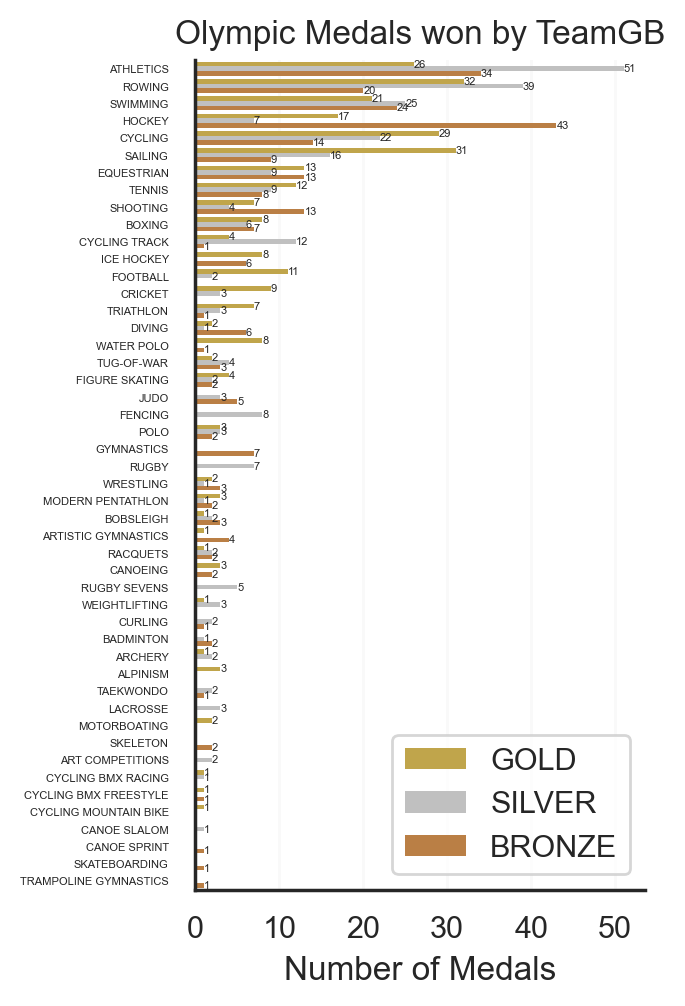

In [9]:
#make a horizontal barplot to show the olympic medals won by team gb

sns.set_style('white', {'grid.color': '#f9f9f9'})


g = sns.catplot(data = final_merged_df, y = 'Sport', x = 'count_by_medal_sex', 
            hue = 'Medal', hue_order = ('GOLD','SILVER', 'BRONZE'), 
            kind = 'bar', errorbar = None, estimator='sum', palette = gsb_palette, legend=False, width= 0.8, linewidth=0
           )
g.set_yticklabels( size=4)
# add labels
for ax in g.axes.ravel():
     for c in ax.containers:
        labels = [int(v) if v > 0 else "" for v in c.datavalues]
        ax.bar_label(c, labels=labels, label_type="edge", size = 4)
        
plt.title("Olympic Medals won by TeamGB")
plt.xlabel("Number of Medals")
plt.ylabel("")
plt.xticks(ticks=[0,10,20,30,40, 50], labels=["0", "10", "20", "30", "40", "50"])
#plt.xaxis.grid(True)
plt.grid(axis = 'x')
plt.legend(loc='lower right')



### in which sports does team GB Women have the most medals (all time)?

In [10]:
#subset the df grouped by Sex to only include females and sort by total medal count

k = df_S[df_S['Sex']=='F']
k=k.sort_values('count_by_sex', ascending=False)

print(k)

   Sex                  Sport  count_by_sex
16   F                 HOCKEY            30
2    F              ATHLETICS            27
23   F               SWIMMING            21
12   F             EQUESTRIAN            21
19   F                 ROWING            10
20   F                SAILING             8
25   F                 TENNIS             8
10   F          CYCLING TRACK             7
7    F                CYCLING             4
1    F    ARTISTIC GYMNASTICS             4
4    F                 BOXING             4
17   F                   JUDO             4
18   F      MODERN PENTATHLON             4
27   F              TRIATHLON             4
14   F         FIGURE SKATING             3
24   F              TAEKWONDO             2
11   F                 DIVING             2
15   F             GYMNASTICS             2
21   F          SKATEBOARDING             1
26   F  TRAMPOLINE GYMNASTICS             1
22   F               SKELETON             1
0    F                ARCHERY   

In [11]:
#subset the merged df to only include females and sort by total medal count by sex


final_merged_df_F = final_merged_df[final_merged_df['Sex']=='F']
final_merged_df_F = final_merged_df_F.sort_values('count_by_sex', ascending=False)

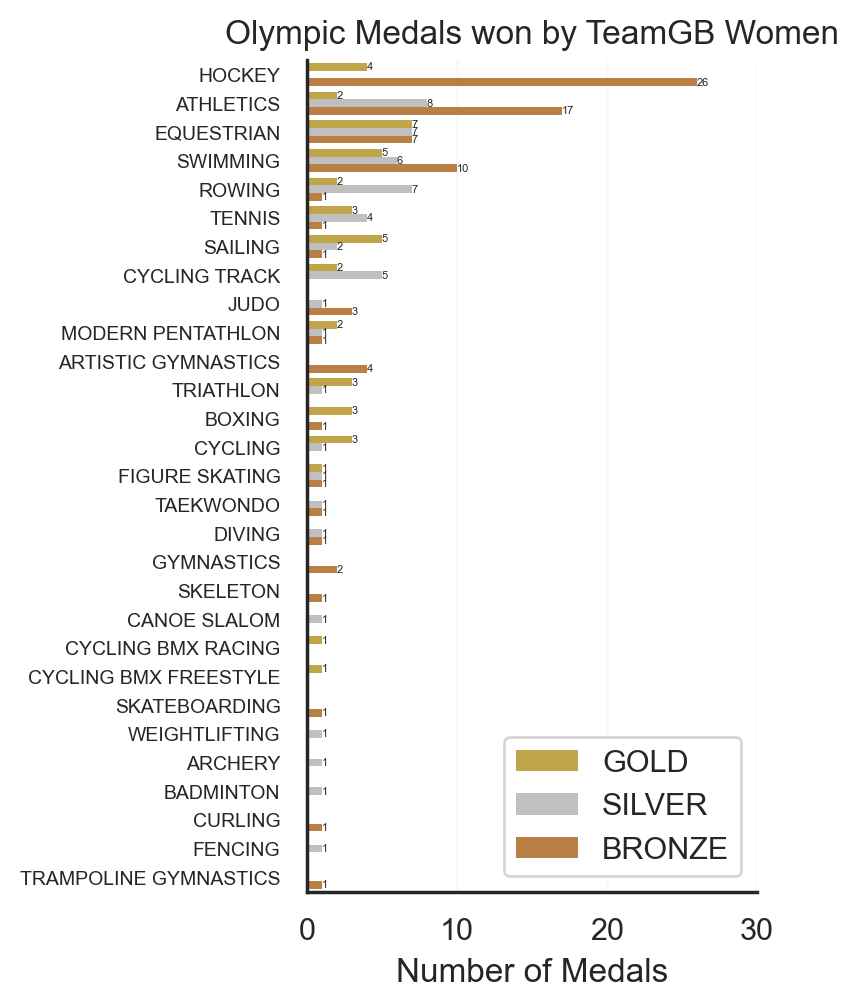

In [12]:
#make a horizontal barplot to show the olympic medals won by team gb women


sns.set_style('white', {'grid.color': '#f9f9f9'})

g = sns.catplot(data = final_merged_df_F, y = 'Sport', x = 'count_by_medal_sex', 
            hue = 'Medal', hue_order = ('GOLD','SILVER', 'BRONZE'), 
            kind = 'bar', errorbar = None, estimator='sum', palette = gsb_palette, legend=False, width= 0.8, linewidth=0
           )
g.set_yticklabels( size=7)

# add labels
for ax in g.axes.ravel():
     for c in ax.containers:
        labels = [int(v) if v > 0 else "" for v in c.datavalues]
        ax.bar_label(c, labels=labels, label_type="edge", size = 4)
        
plt.title("Olympic Medals won by TeamGB Women")
plt.xlabel("Number of Medals")
plt.ylabel("")
plt.xticks(ticks=[0,10,20,30], labels=["0", "10", "20", "30"])
#plt.xaxis.grid(True)
plt.grid(axis = 'x')
plt.legend(loc='lower right')

### in which sports does team GB have a medal but no gold medal?

In [17]:
#make a pivot table to list how many gold, silver, and bronze medals were won for each sport. if there is no entry, enter 0 as this means no medals were won.
df_M_pivot = df_M.pivot_table(values='count_by_medal', index='Sport', columns='Medal', aggfunc='sum', fill_value=0)

In [18]:
df_M_pivot.style

Medal,BRONZE,GOLD,SILVER
Sport,,,
ALPINISM,0,3,0
ARCHERY,0,1,2
ART COMPETITIONS,0,0,2
ARTISTIC GYMNASTICS,4,1,0
ATHLETICS,34,26,51
BADMINTON,2,0,1
BOBSLEIGH,3,1,2
BOXING,7,8,6
CANOE SLALOM,0,0,1


In [22]:
#list the sports that have a value greater than 0 in the bronze or silver columns, but where the gold column is 0

no_gold = df_M_pivot[((df_M_pivot['BRONZE'] > 0) | (df_M_pivot['SILVER'] > 0)) & (df_M_pivot['GOLD'] == 0)]
print(no_gold)

Medal                  BRONZE  GOLD  SILVER
Sport                                      
ART COMPETITIONS            0     0       2
BADMINTON                   2     0       1
CANOE SLALOM                0     0       1
CANOE SPRINT                1     0       0
CURLING                     1     0       2
FENCING                     0     0       8
GYMNASTICS                  7     0       0
JUDO                        5     0       3
LACROSSE                    0     0       3
RUGBY                       0     0       7
RUGBY SEVENS                0     0       5
SKATEBOARDING               1     0       0
SKELETON                    2     0       0
TAEKWONDO                   1     0       2
TRAMPOLINE GYMNASTICS       1     0       0


However, fact-checking this information online details that there is missing data here so in fact Team GB has won gold in Canoe Slalom, Canoe Spring, Curling, Fencing, Skeleton, and Gymnastics.